In [2]:
import pandas as pd #package for reading data
import numpy as np 
import matplotlib.pyplot as plt #package for creating plots

Import data into the notebook

In [3]:
data_folder = "drills_data/"
prices = pd.read_csv(data_folder + "prices.csv")
print(prices.describe())

               date  zipcode          rank          page           upc  \
count  2.052900e+04  20529.0  20509.000000  20509.000000  4.104000e+03   
mean   1.582557e+12  78722.0      5.590424      1.010629  7.540908e+11   
std    2.885633e+09      0.0      6.716571      0.111220  2.507315e+11   
min    1.578772e+12  78722.0      0.000000      1.000000  3.463456e+08   
25%    1.580156e+12  78722.0      0.000000      1.000000  7.177090e+11   
50%    1.581537e+12  78722.0      2.000000      1.000000  8.859112e+11   
75%    1.585119e+12  78722.0     11.000000      1.000000  8.859115e+11   
max    1.591201e+12  78722.0     20.000000      3.000000  9.979645e+11   

              price   list_price      in_stock       max_qty       arrives  \
count  19652.000000  7296.000000  14326.000000  10260.000000  7.247000e+03   
mean     137.824103   162.441432      0.757294     16.291131  1.583009e+12   
std      143.528278   136.005844      0.428733     11.989490  2.955275e+09   
min        5.220000  


# Promotions/ads

What percentage of drills have ads both overall and by each platform?

In [31]:
# percentage of drills with ads, overall
drills_w_ads = prices.loc[prices['ads'] == 1]
percentage_overall = len(drills_w_ads) / (len(prices) + 1) * 100
round(percentage_overall, 3)

1.7


In [54]:
# percentage of drills by each platform, overall
prices['obs'] = ""
ads_by_platform = pd.DataFrame(drills_w_ads.groupby('platform')['obs'].count())['obs'].to_dict()
for key,val in ads_by_platform.items():
    print(key, round(val/(len(prices)+1)*100,2))

AMZN 1.7


What percentage of ads are on the first page for each platform?

In [55]:
page_1 = prices.loc[(prices['ads'] == 1) & (prices['page'] == 1)]
ads_on_page1 = pd.DataFrame(page_1.groupby('platform')['obs'].count())['obs'].to_dict()
for key,val in ads_on_page1.items():
    print(key, round(val/(len(prices)+1)*100,2))

AMZN 1.7


Are ads correlated with rank in page i.e. create a scatter plot and report the correlation.

-0.06354386648139812

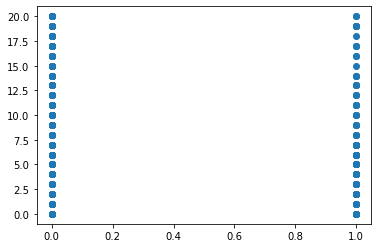

In [59]:
plt.scatter(prices['ads'], prices['rank'])
prices['ads'].corr(prices['rank'])

For products that have ads how does search rank change the next 4 observations, on average? (i.e. use shift)